In [3]:
import numpy as np
import matplotlib.pyplot as plt
from solvers_by_Artyom import poiseuille_solver, convection_diffusion_solver
from gif_creation import anim_result

# Steady Plane Poiseuille Flow


The Navier Stokes equation obtained using Conservation of momentum can be written for horizontal components as below

$$
\rho\left(\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}+v \frac{\partial u}{\partial y}\right)=-\frac{\partial p}{\partial x}+\mu\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)
$$

No vertical motion of fluid is assumed

$$
v=0 
$$

At steady state the velocity profile obtains a form that doesn't vary with time thus time derivatives are equal to zero and 
The horizontal velocity is assumed to have same value throught for all values of x for a particular y at steady state which implies gradient of u w.r.t. x is 0.
Thus,

$$
\frac{\partial u}{\partial t}=0, \frac{\partial u}{\partial x}=0, v \frac{\partial u}{\partial y}=0, \frac{\partial^{2} u}{\partial x^{2}}=0
$$

Thus at steady state,

$$
\frac{\partial p}{\partial x}=\mu\left(\frac{\partial^{2} u}{\partial y^{2}}\right)
$$


In [4]:
mu = 5                #viscosity
Pl = 200                #Pressure on the left boundary
Pr = 300                #Pressure on the right boundary
L = 1                #Horizontal length 
press_grad = (Pr - Pl)/L        #Pressure gradient
H = 1                 #Vertical height
Nysteps = 50

In [5]:
u = poiseuille_solver(Pr, Pl, H, L, Nysteps, mu)
y = np.linspace(0, H, Nysteps)
analytical_solution = -press_grad/(2*mu)*y*(H-y)

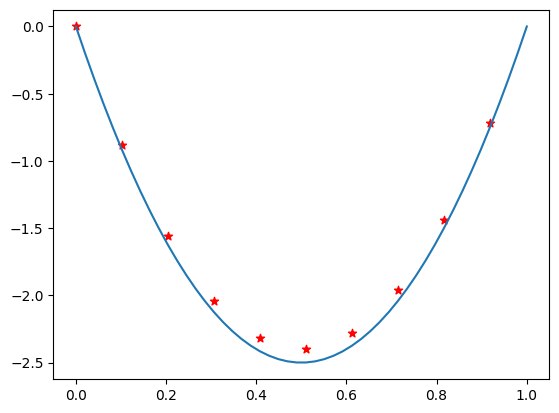

In [6]:
visualize_frequency=5
plt.scatter(y[::visualize_frequency], u[::visualize_frequency], marker='*', c='red')
plt.plot(y, analytical_solution)

In [7]:
init_cond = np.zeros(shape=(Nysteps, int(L/H*Nysteps)))
init_cond = init_cond.T
init_cond[20] = 1
init_cond = init_cond.T

In [8]:
time = 0.2

In [9]:
c, timestep, pe = convection_diffusion_solver(init_cond, H, L, time, u, 0.01)
c = c[:,1:-1,1:-1]

100%|██████████| 1999/1999 [00:00<00:00, 6126.32it/s]


In [10]:
pe

array([ 0.   , -0.096, -0.188, -0.276, -0.36 , -0.44 , -0.516, -0.588,
       -0.656, -0.72 , -0.78 , -0.836, -0.888, -0.936, -0.98 , -1.02 ,
       -1.056, -1.088, -1.116, -1.14 , -1.16 , -1.176, -1.188, -1.196,
       -1.2  , -1.2  , -1.196, -1.188, -1.176, -1.16 , -1.14 , -1.116,
       -1.088, -1.056, -1.02 , -0.98 , -0.936, -0.888, -0.836, -0.78 ,
       -0.72 , -0.656, -0.588, -0.516, -0.44 , -0.36 , -0.276, -0.188,
       -0.096,  0.   ])

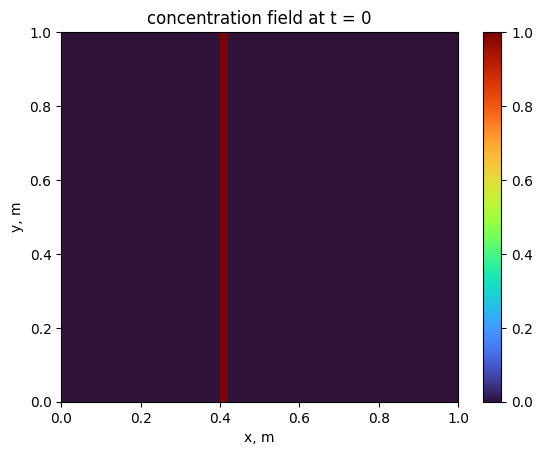

In [11]:
anim_result(c, timestep, L, H, picture=True, showMe=True)